# Usage GraphGenerator

In [1]:
%load_ext autoreload
%autoreload 2
    
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib


from sklearn.decomposition import TruncatedSVD
from eden import graph
import umap

import numpy as np

from embedder import Embedder
from embedder import Model
from evaluator import Evaluator
from graph_generator import Graph_Generator

# Examples

numver of graphs:  1000
number of nodes per graphs:  25
degree:  4
seed:  10

Graph_1
size node alphabet:  25
size edge alphabet:  5
How many perturbations:  1

Graph_2
size node alphabet:  25
size edge alphabet:  5
How many perturbations:  1


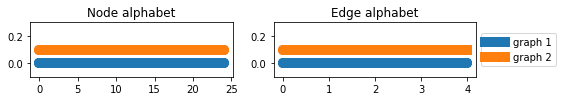

accuracy mean:  1.0


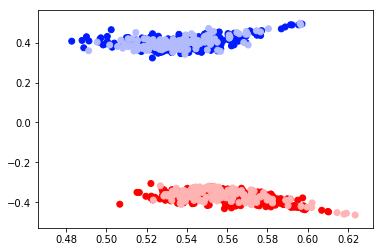

In [4]:
generate_and_test(node_alph_end_g1 = 25,
                  pert_times_g1 = 1,
                  node_alph_end_g2 = 25,
                  pert_times_g2 = 1,
                  n_nodes = 25 ,
                  n_graphs = 1000 , 
                  degree = 4, 
                  seed = 10)   

numver of graphs:  1000
number of nodes per graphs:  25
degree:  4
seed:  10

Graph_1
size node alphabet:  25
size edge alphabet:  5
How many perturbations:  10

Graph_2
size node alphabet:  25
size edge alphabet:  5
How many perturbations:  10


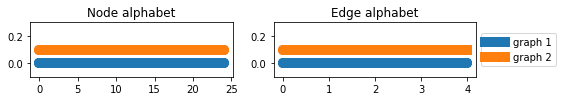

accuracy mean:  0.9931034482758619


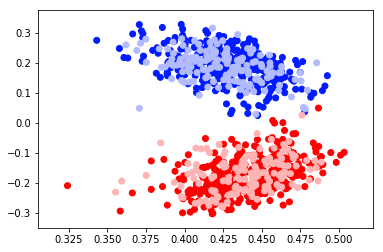

In [5]:
generate_and_test(node_alph_end_g1 = 25,
                  pert_times_g1 = 10,
                  node_alph_end_g2 = 25,
                  pert_times_g2 = 10)  

numver of graphs:  1000
number of nodes per graphs:  25
degree:  4
seed:  10

Graph_1
size node alphabet:  25
size edge alphabet:  5
How many perturbations:  50

Graph_2
size node alphabet:  25
size edge alphabet:  5
How many perturbations:  50


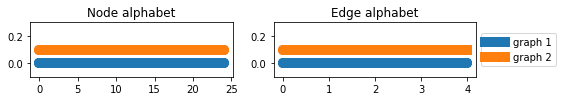

accuracy mean:  0.6643789395624768


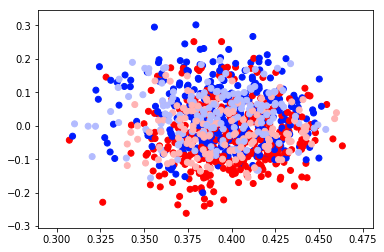

In [6]:
generate_and_test(node_alph_end_g1 = 25,
                  pert_times_g1 = 50,
                  node_alph_end_g2 = 25,
                  pert_times_g2 = 50) 

numver of graphs:  1000
number of nodes per graphs:  25
degree:  4
seed:  10

Graph_1
size node alphabet:  25
size edge alphabet:  5
How many perturbations:  100

Graph_2
size node alphabet:  25
size edge alphabet:  5
How many perturbations:  100


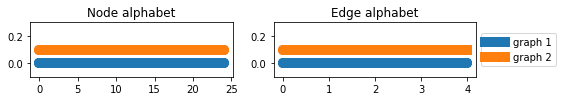

accuracy mean:  0.5129032258064516


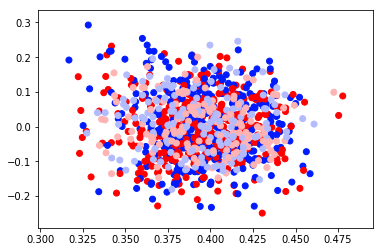

In [7]:
generate_and_test(node_alph_end_g1 = 25,
                  pert_times_g1 = 100,
                  node_alph_end_g2 = 25,
                  pert_times_g2 = 100) 

## Reducing the size of the alphabet

numver of graphs:  1000
number of nodes per graphs:  25
degree:  4
seed:  10

Graph_1
size node alphabet:  5
size edge alphabet:  5
How many perturbations:  1

Graph_2
size node alphabet:  5
size edge alphabet:  5
How many perturbations:  1


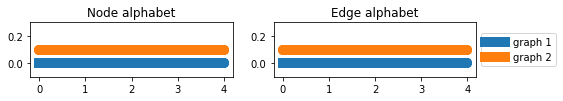

accuracy mean:  1.0


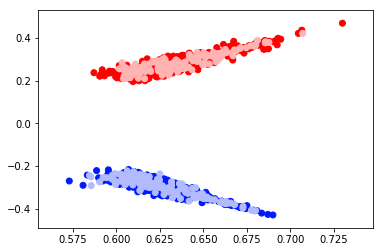

In [8]:
generate_and_test(node_alph_end_g1 = 5,
                  pert_times_g1 = 1,
                  node_alph_end_g2 = 5,
                  pert_times_g2 = 1)  

numver of graphs:  1000
number of nodes per graphs:  25
degree:  4
seed:  10

Graph_1
size node alphabet:  5
size edge alphabet:  5
How many perturbations:  5

Graph_2
size node alphabet:  5
size edge alphabet:  5
How many perturbations:  5


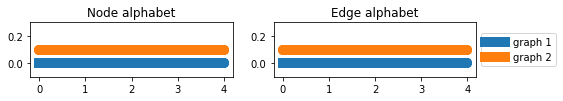

accuracy mean:  0.9100259547645532


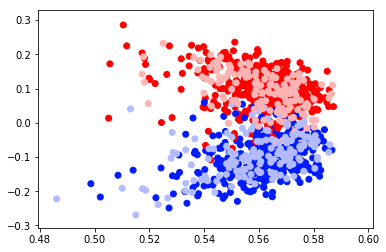

In [11]:
generate_and_test(node_alph_end_g1 = 5,
                  pert_times_g1 = 5,
                  node_alph_end_g2 = 5,
                  pert_times_g2 = 5) 

numver of graphs:  1000
number of nodes per graphs:  25
degree:  4
seed:  10

Graph_1
size node alphabet:  5
size edge alphabet:  5
How many perturbations:  10

Graph_2
size node alphabet:  5
size edge alphabet:  5
How many perturbations:  10


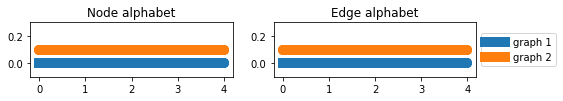

accuracy mean:  0.6677196885428255


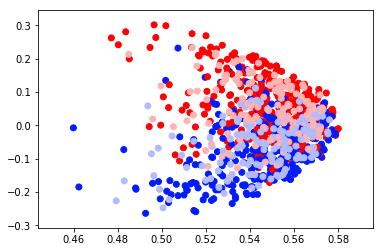

In [9]:
generate_and_test(node_alph_end_g1 = 5,
                  pert_times_g1 = 10,
                  node_alph_end_g2 = 5,
                  pert_times_g2 = 10) 

numver of graphs:  1000
number of nodes per graphs:  25
degree:  4
seed:  10

Graph_1
size node alphabet:  5
size edge alphabet:  5
How many perturbations:  25

Graph_2
size node alphabet:  5
size edge alphabet:  5
How many perturbations:  25


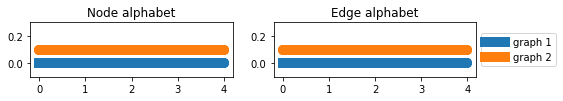

accuracy mean:  0.5030960326288467


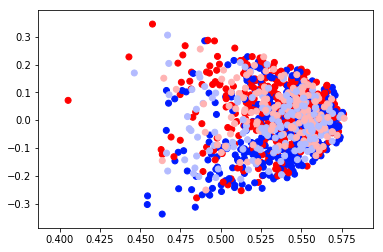

In [10]:
generate_and_test(node_alph_end_g1 = 5,
                  pert_times_g1 = 25,
                  node_alph_end_g2 = 5,
                  pert_times_g2 = 25)

# Plot 10 graphs

In [50]:
import warnings
import networkx as nx
from eden.display import draw_graph_set

gen = Graph_Generator(n_graphs = 10, degree = 3)


g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = 10,
                                          node_alph_end = 5,
                                          edge_alph_end = 3)


g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = 10,
                                          node_alph_end = 4,
                                          edge_alph_end = 3)


g1_1 = gen.perturb(g1,node_alph_1,edge_alph_1,1)
g1_10 = gen.perturb(g1,node_alph_1,edge_alph_1,10)
g1_50 = gen.perturb(g1,node_alph_1,edge_alph_1,50)
g1_100 = gen.perturb(g1,node_alph_1,edge_alph_1,100)

g2_1 = gen.perturb(g2,node_alph_1,edge_alph_1,1)
g2_10 = gen.perturb(g2,node_alph_1,edge_alph_1,10)
g2_50 = gen.perturb(g2,node_alph_1,edge_alph_1,50)


	 original graph_1 		 1 perturbation 		 10 perturbation 	 50 perturbation 


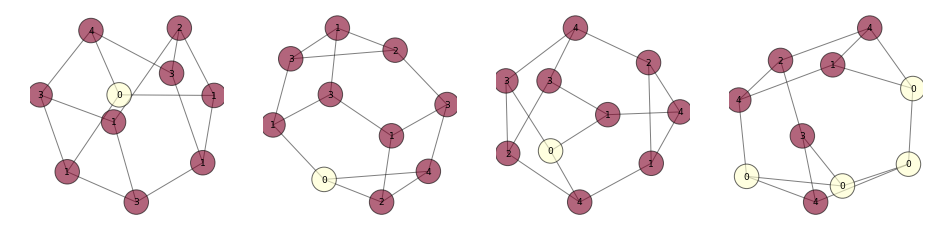

	 original graph_2 		 1 perturbation 		 10 perturbation 	 50 perturbation 


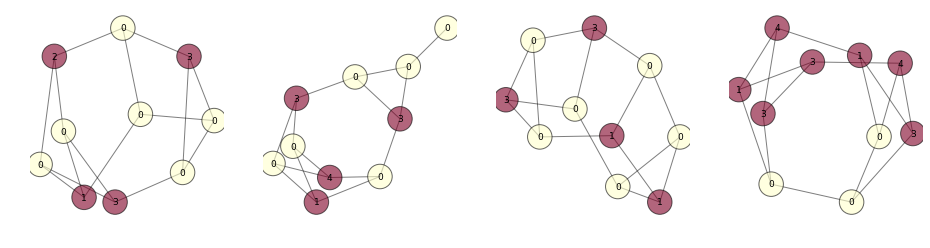

In [51]:
warnings.filterwarnings('ignore')
print ("\t original graph_1 \t\t 1 perturbation \t\t 10 perturbation \t 50 perturbation ")
draw_graph_set([g1,g1_1,g1_10,g1_50],n_graphs_per_line=4, vertex_color='label')
print ("\t original graph_2 \t\t 1 perturbation \t\t 10 perturbation \t 50 perturbation ")
draw_graph_set([g2,g2_1,g2_10,g2_50],n_graphs_per_line=4, vertex_color='label')


In [2]:
def generate_and_test(node_alph_end_g1,pert_times_g1,node_alph_end_g2,pert_times_g2,n_nodes = 25 ,n_graphs = 1000 , degree = 4, seed = 10):
    # instanziate class Graph_Generator
    gen = Graph_Generator(n_graphs = n_graphs , degree = degree, seed = seed)

    g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = n_nodes,
                                              node_alph_end = node_alph_end_g1,
                                              edge_alph_end = 5,
                                             seed=seed)

    g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = n_nodes,
                                              node_alph_end = node_alph_end_g2,
                                              edge_alph_end = 5,
                                             seed=seed)
    print("numver of graphs: ",n_graphs)
    print("number of nodes per graphs: ",n_nodes)
    print("degree: ",degree)
    print("seed: ",seed)
    print("")
    print("Graph_1")
    print("size node alphabet: ",len(node_alph_1))
    print("size edge alphabet: ",len(edge_alph_1))
    print("How many perturbations: ",pert_times_g1)
    print("")
    print("Graph_2")
    print("size node alphabet: ",len(node_alph_2))
    print("size edge alphabet: ",len(edge_alph_2))
    print("How many perturbations: ",pert_times_g2)


    graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                     node_alph_2,edge_alph_2,
                                     pert_times_g1 = pert_times_g1,
                                     pert_times_g2 = pert_times_g2,                                 
                                     plot = True)

    fit_transfomr_plot(graphs, labels)


def fit_transfomr_plot(graphs, labels):

    # split the graphs and the labels
    X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.3
                                                        , random_state=0)
    y_test = [[i] for i in y_test]
    y_test = np.ravel(y_test)
    y_train = [[i] for i in y_train]
    y_train = np.ravel(y_train)

    
    
    # dimension of the last embedding
    dimension_embedding = 2

    # instanziate first model
    eden = graph.Vectorizer(complexity = 2)
    model1 = Model(eden, has_fit = False)

    # instanziate second model
    pca = TruncatedSVD(n_components=dimension_embedding)
    model2 = Model(pca)


    # fit and transform
    # mode1 --> model2 --> model3
    emb = Embedder([model1,model2])
    Xd_test = emb.fit(X_train,y_train).transform(X_test)
    
    eva = Evaluator()
    a,p,r,f = eva.performance_with_kfold(Xd_test,y_test)

    print("accuracy mean: ",np.mean(a))
    colors1 = ['#FF0000','#001BFF']
    colors2 = ['#FFB3B3','#B3BBFF']

    Xd_train = emb.transform(X_train)


    plt.scatter(Xd_train[:,0],Xd_train[:,1],c=y_train, 
                cmap=matplotlib.colors.ListedColormap(colors1))
    plt.scatter(Xd_test[:,0],Xd_test[:,1],c=y_test, 
                cmap=matplotlib.colors.ListedColormap(colors2))
    plt.show()